# Import Dependencies and Load CSV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import warnings
import os
from pprint import pprint
warnings.filterwarnings('ignore')

In [3]:
all_crime_df = pd.read_csv("crimes_2001_to_present.csv")
all_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,24761,JC444497,09/22/2019 11:52:00 PM,030XX N KIMBALL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,-87.712401,"(41.936274201, -87.712400898)",15.0,21538.0,22.0,55.0,12.0,39.0,7.0,168.0
1,11837612,JC444514,09/22/2019 11:45:00 PM,004XX W 111TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.634289,"(41.692454712, -87.634288569)",45.0,21861.0,45.0,525.0,22.0,19.0,9.0,258.0
2,11838692,JC444512,09/22/2019 11:45:00 PM,039XX W MONTROSE AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,...,-87.725967,"(41.960970619, -87.725967322)",28.0,21538.0,16.0,117.0,38.0,39.0,1.0,9.0
3,11837693,JC444507,09/22/2019 11:42:00 PM,064XX S LAFLIN ST,0810,THEFT,OVER $500,RESIDENCE,False,True,...,-87.661712,"(41.776937286, -87.661711588)",17.0,22257.0,65.0,279.0,2.0,23.0,17.0,204.0
4,11837630,JC444521,09/22/2019 11:40:00 PM,024XX E 79TH ST,2016,NARCOTICS,MANU/DELIVER:PCP,STREET,True,False,...,-87.564609,"(41.751753433, -87.564608821)",43.0,21202.0,39.0,246.0,37.0,24.0,19.0,225.0


# Total Crime in Chicago (2001-Present)

In [4]:
crime = len(all_crime_df["ID"].value_counts())
crime_count=pd.DataFrame([crime], columns = ["Total Crimes Recorded"])
crime_count

,Total Crimes Recorded
0,6975703


# Sort All Crime by Crime Type and Groupby Primary Crime Type

In [5]:
all_crime_df["Primary Type"].value_counts()

THEFT                                1472295
BATTERY                              1275384
CRIMINAL DAMAGE                       794691
NARCOTICS                             723526
ASSAULT                               436450
OTHER OFFENSE                         433346
BURGLARY                              396448
MOTOR VEHICLE THEFT                   322205
DECEPTIVE PRACTICE                    279804
ROBBERY                               262656
CRIMINAL TRESPASS                     199270
WEAPONS VIOLATION                      76139
PROSTITUTION                           68927
PUBLIC PEACE VIOLATION                 49145
OFFENSE INVOLVING CHILDREN             47566
CRIM SEXUAL ASSAULT                    28698
SEX OFFENSE                            26285
INTERFERENCE WITH PUBLIC OFFICER       16489
GAMBLING                               14547
LIQUOR LAW VIOLATION                   14262
ARSON                                  11472
HOMICIDE                                9910
KIDNAPPING

In [6]:
# Create a group based on the values in the 'Primary Type' column
all_crime_group = all_crime_df.groupby('Primary Type')

# Count how many times each 'Primary Type' appears in our group
count_all_crime = all_crime_group['Primary Type'].count()
count_all_crime

Primary Type
ARSON                                  11472
ASSAULT                               436450
BATTERY                              1275384
BURGLARY                              396448
CONCEALED CARRY LICENSE VIOLATION        472
CRIM SEXUAL ASSAULT                    28698
CRIMINAL DAMAGE                       794691
CRIMINAL TRESPASS                     199270
DECEPTIVE PRACTICE                    279804
DOMESTIC VIOLENCE                          1
GAMBLING                               14547
HOMICIDE                                9910
HUMAN TRAFFICKING                         59
INTERFERENCE WITH PUBLIC OFFICER       16489
INTIMIDATION                            4091
KIDNAPPING                              6816
LIQUOR LAW VIOLATION                   14262
MOTOR VEHICLE THEFT                   322205
NARCOTICS                             723526
NON - CRIMINAL                            38
NON-CRIMINAL                             171
NON-CRIMINAL (SUBJECT SPECIFIED)          

In [7]:
cac_df = all_crime_df["Primary Type"].value_counts().rename_axis('Offense Type').reset_index(name='counts')
print (cac_df)

                         Offense Type   counts
0                               THEFT  1472295
1                             BATTERY  1275384
2                     CRIMINAL DAMAGE   794691
3                           NARCOTICS   723526
4                             ASSAULT   436450
5                       OTHER OFFENSE   433346
6                            BURGLARY   396448
7                 MOTOR VEHICLE THEFT   322205
8                  DECEPTIVE PRACTICE   279804
9                             ROBBERY   262656
10                  CRIMINAL TRESPASS   199270
11                  WEAPONS VIOLATION    76139
12                       PROSTITUTION    68927
13             PUBLIC PEACE VIOLATION    49145
14         OFFENSE INVOLVING CHILDREN    47566
15                CRIM SEXUAL ASSAULT    28698
16                        SEX OFFENSE    26285
17   INTERFERENCE WITH PUBLIC OFFICER    16489
18                           GAMBLING    14547
19               LIQUOR LAW VIOLATION    14262
20           

In [8]:
# Remove NA Values 
remove_na_all_crime_df = all_crime_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
remove_na_all_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,24761,JC444497,09/22/2019 11:52:00 PM,030XX N KIMBALL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,-87.712401,"(41.936274201, -87.712400898)",15.0,21538.0,22.0,55.0,12.0,39.0,7.0,168.0
1,11837612,JC444514,09/22/2019 11:45:00 PM,004XX W 111TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.634289,"(41.692454712, -87.634288569)",45.0,21861.0,45.0,525.0,22.0,19.0,9.0,258.0
2,11838692,JC444512,09/22/2019 11:45:00 PM,039XX W MONTROSE AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,...,-87.725967,"(41.960970619, -87.725967322)",28.0,21538.0,16.0,117.0,38.0,39.0,1.0,9.0
3,11837693,JC444507,09/22/2019 11:42:00 PM,064XX S LAFLIN ST,0810,THEFT,OVER $500,RESIDENCE,False,True,...,-87.661712,"(41.776937286, -87.661711588)",17.0,22257.0,65.0,279.0,2.0,23.0,17.0,204.0
4,11837630,JC444521,09/22/2019 11:40:00 PM,024XX E 79TH ST,2016,NARCOTICS,MANU/DELIVER:PCP,STREET,True,False,...,-87.564609,"(41.751753433, -87.564608821)",43.0,21202.0,39.0,246.0,37.0,24.0,19.0,225.0


In [9]:
crime = len(remove_na_all_crime_df["ID"].value_counts())
crime_drop_count=pd.DataFrame([crime], columns = ["Total Crimes Recorded"])
crime_drop_count

,Total Crimes Recorded
0,6272765


In [10]:
count_all_nan_df = remove_na_all_crime_df["Primary Type"].value_counts().rename_axis('Offense Type').reset_index(name='counts')
print (count_all_nan_df)

                         Offense Type   counts
0                               THEFT  1326159
1                             BATTERY  1148684
2                     CRIMINAL DAMAGE   717360
3                           NARCOTICS   646046
4                             ASSAULT   393544
5                       OTHER OFFENSE   389314
6                            BURGLARY   361352
7                 MOTOR VEHICLE THEFT   285761
8                  DECEPTIVE PRACTICE   246283
9                             ROBBERY   237338
10                  CRIMINAL TRESPASS   180436
11                  WEAPONS VIOLATION    70046
12                       PROSTITUTION    60303
13             PUBLIC PEACE VIOLATION    45393
14         OFFENSE INVOLVING CHILDREN    42358
15                CRIM SEXUAL ASSAULT    24989
16                        SEX OFFENSE    22377
17   INTERFERENCE WITH PUBLIC OFFICER    15880
18                           GAMBLING    13313
19               LIQUOR LAW VIOLATION    12123
20           

# All Crime Chicago - All Battery, Assault, Criminal Sexual Assault 

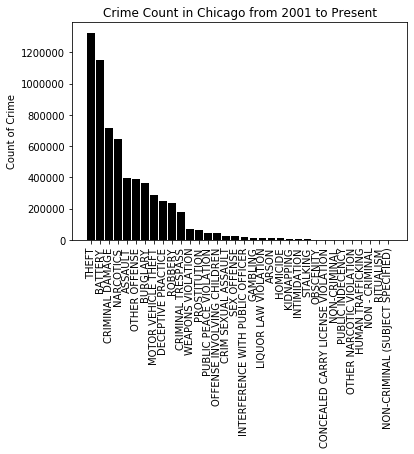

In [11]:
plt.bar(count_all_nan_df["Offense Type"], count_all_nan_df["counts"], color="k", align="center")

plt.title("Crime Count in Chicago from 2001 to Present")

plt.xticks(rotation=90)

plt.ylabel("Count of Crime")

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [12]:
#Remove irrelevant crimes; limit to Battery, Assault, Criminal Assault 
assault_df = count_all_nan_df.drop([0,2,3,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33])
assault_df

,Offense Type,counts
1,BATTERY,1148684
4,ASSAULT,393544
15,CRIM SEXUAL ASSAULT,24989


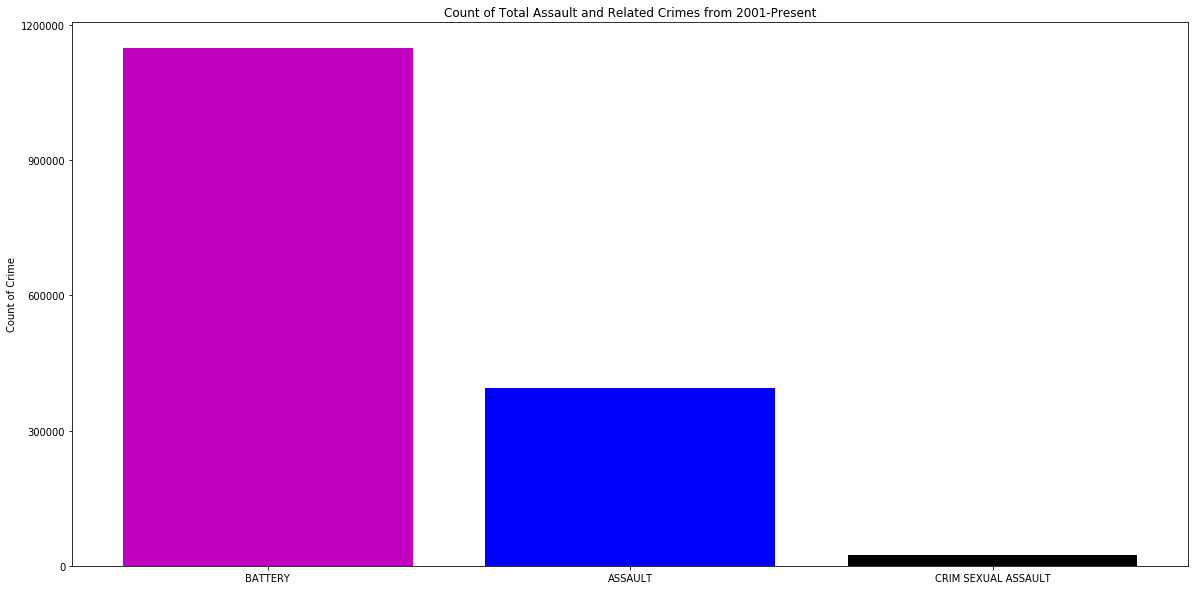

In [13]:
# Bar plot of Relevant Crimes from 2001-present 
plt.bar(assault_df["Offense Type"], assault_df["counts"], color=['m', 'b', 'k'], align="center")
plt.title("Count of Total Assault and Related Crimes from 2001-Present")

axes = plt.axes()
plt.xticks(rotation=360)
axes.set_yticks([0, 300000, 600000, 900000, 1200000])
plt.ylabel("Count of Crime")

plt.rcParams["figure.figsize"] = (20, 10)

plt.show()

# Battery, Assault, Criminal Sexual Assault by Ward (Bar Chart)


In [14]:
cac_wards_df = remove_na_all_crime_df[["Wards","Primary Type"]].sort_values("Wards")
cac_wards_df.head()

,Wards,Primary Type
5620290,1.0,CRIMINAL DAMAGE
6057027,1.0,BURGLARY
2565616,1.0,THEFT
1527635,1.0,OTHER OFFENSE
4204364,1.0,CRIMINAL DAMAGE


In [15]:
cac_wards_count = len(cac_wards_df)
cac_wards_count

6272765

In [16]:
by_ward_assault_df = remove_na_all_crime_df[remove_na_all_crime_df["Primary Type"].isin(["BATTERY", "ASSAULT", "CRIM SEXUAL ASSAULT"])].groupby(["Wards", "Primary Type"])["ID"].count().reset_index(name='counts')
by_ward_assault_df

,Wards,Primary Type,counts
0,1.0,ASSAULT,5417
1,1.0,BATTERY,15895
2,1.0,CRIM SEXUAL ASSAULT,314
3,2.0,ASSAULT,16414
4,2.0,BATTERY,50627
...,...,...,...
145,49.0,BATTERY,22416
146,49.0,CRIM SEXUAL ASSAULT,474
147,50.0,ASSAULT,3852
148,50.0,BATTERY,10250


In [17]:
by_ward_assault_pivot_df = by_ward_assault_df.pivot(index='Wards', columns='Primary Type', values='counts')
by_ward_assault_pivot_df

Primary Type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT
Wards,,,
1.0,5417,15895,314
2.0,16414,50627,965
3.0,7749,24188,528
4.0,17766,55812,1121
5.0,5559,17378,428
6.0,3905,9810,226
7.0,10649,32536,689
8.0,4171,11856,300
9.0,12897,39193,736


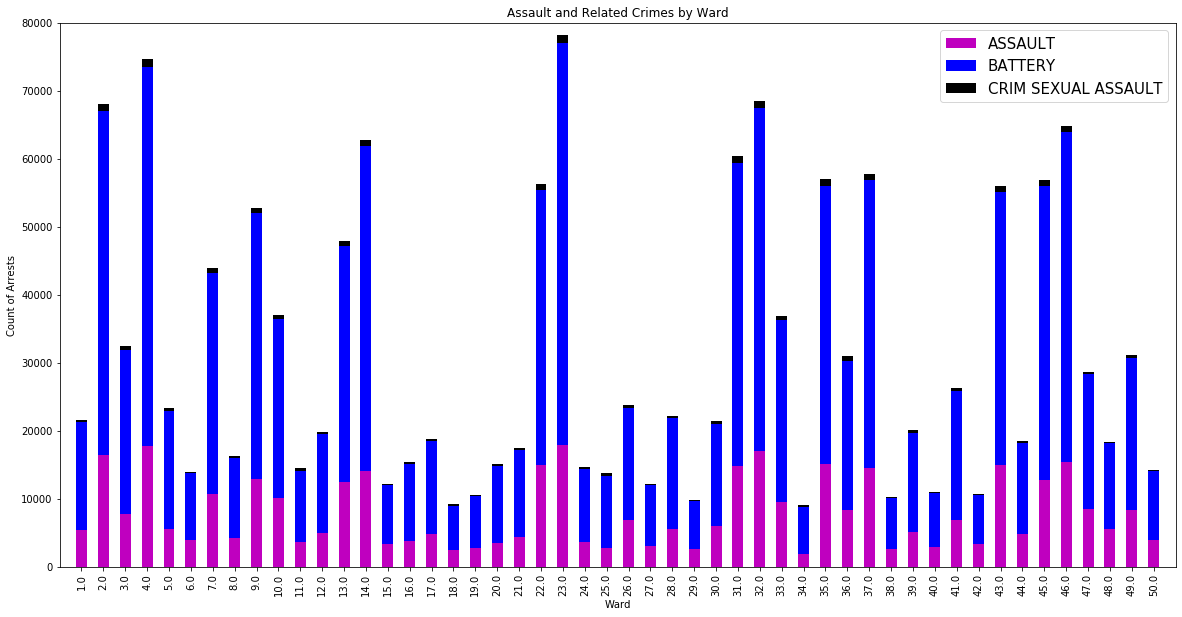

<Figure size 2160x720 with 0 Axes>

In [18]:
by_ward_assault_pivot_df.plot.bar(stacked=True, color=['m', 'b', 'k'], align='center')
plt.title("Assault and Related Crimes by Ward")

plt.xlim(-1.0, 50.0)
plt.ylim(0, 80000)

plt.xlabel("Ward")
plt.ylabel("Count of Arrests")

plt.legend(loc="best", prop={'size': 15})

plt.rcParams["figure.figsize"] = (30,10)
plt.show()
plt.savefig('Assault and Related Crimes by Ward', dpi=96.0, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [18]:
#Top wards are 2.0, 3.0, 23.0 
#Bottom wards are 18.0, 34.0, 29.0 

In [21]:
top_ward_assault_df = by_ward_assault_pivot_df.drop([1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0])
top_ward_assault_df

Primary Type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT
Wards,,,
2.0,16414,50627,965
3.0,7749,24188,528
23.0,17855,59188,1170


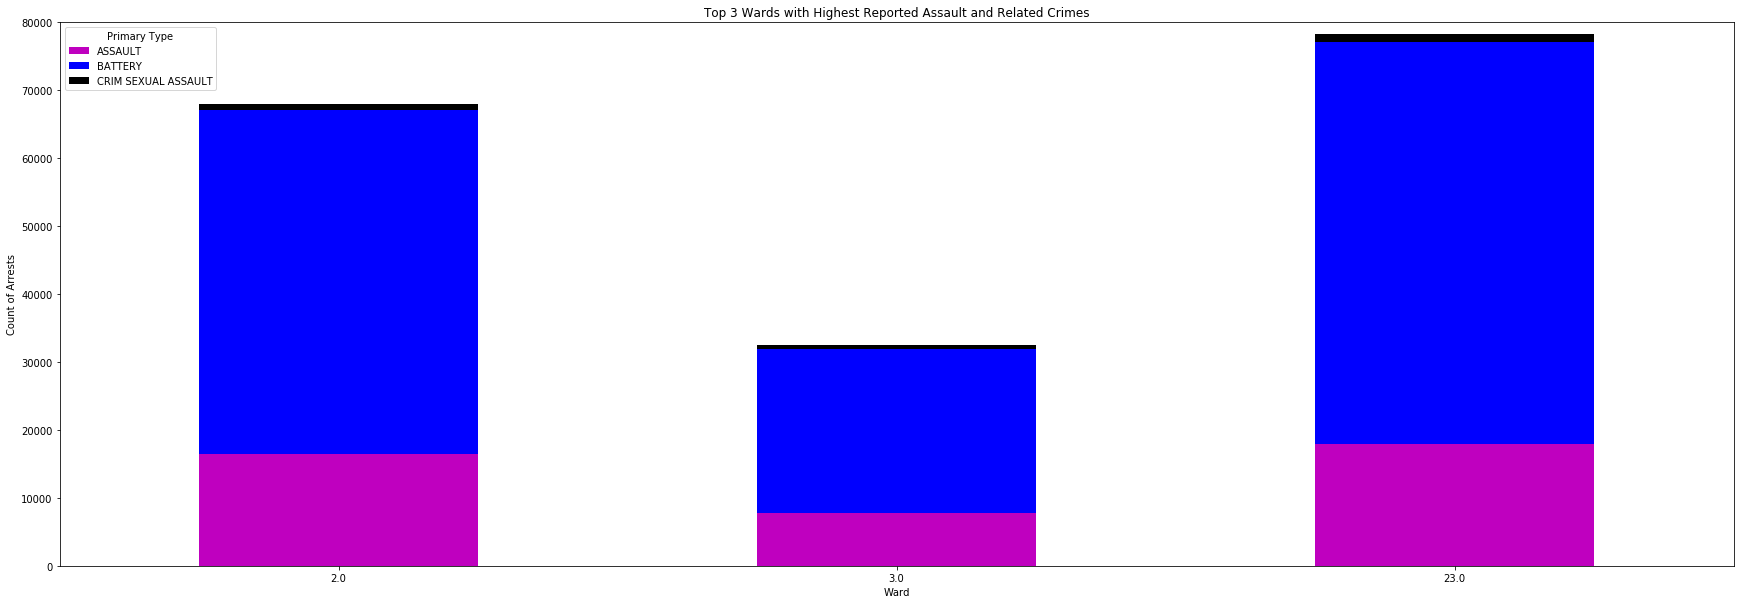

<Figure size 2160x720 with 0 Axes>

In [22]:
top_ward_assault_df.plot.bar(stacked=True,color=['m', 'b', 'k'], align='center')

plt.title('Top 3 Wards with Highest Reported Assault and Related Crimes')

plt.ylabel("Count of Arrests")
plt.ylim(0, 80000)

plt.xlabel("Ward")
plt.xticks(rotation=360)

plt.rcParams["figure.figsize"] = (30,10)
plt.show()

plt.savefig('Top Wards-Bar', dpi=96.0, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [23]:
bott_ward_assault_df = by_ward_assault_pivot_df.drop([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0,  35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0])
bott_ward_assault_df

Primary Type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT
Wards,,,
18.0,2460,6474,229
29.0,2632,7024,123
34.0,1865,6836,285


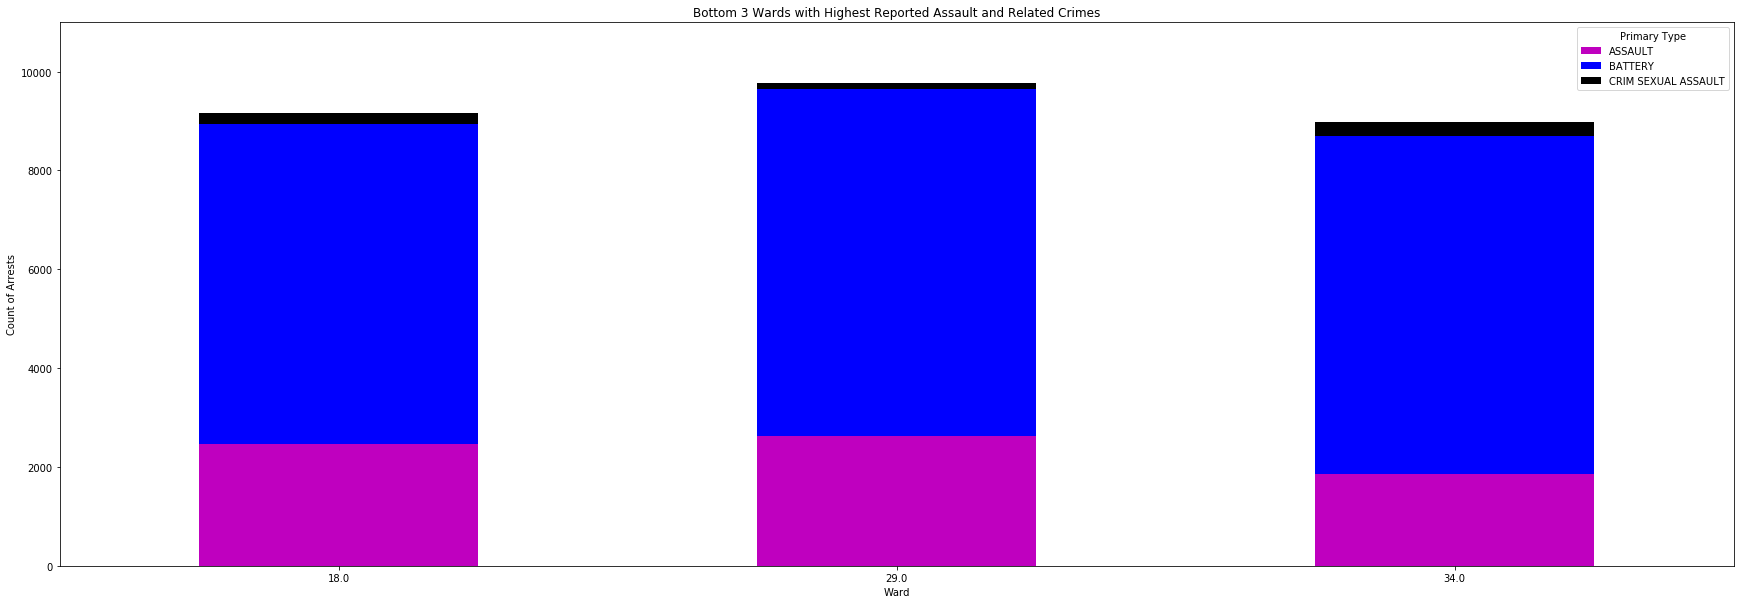

<Figure size 2160x720 with 0 Axes>

In [24]:
bott_ward_assault_df.plot.bar(stacked=True,color=['m', 'b', 'k'], align='center')

plt.title('Bottom 3 Wards with Highest Reported Assault and Related Crimes')

plt.ylabel("Count of Arrests")
plt.ylim(0, 11000)

plt.xlabel("Ward")
plt.xticks(rotation=360)

plt.rcParams["figure.figsize"] = (30,10)

plt.show()

plt.savefig('Bottom Wards-Bar', dpi=96.0, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Assault and Related Crimes by Month (Line graph showing trends of arrest in top and bottom wards over 18 years)

In [25]:
# Groupby ward (exclude other wards), groupby year 

In [26]:
assault_ward_year_df = remove_na_all_crime_df[remove_na_all_crime_df["Primary Type"].isin(["ASSAULT"])].groupby(["Wards", "Primary Type", "Year"])["ID"].count().reset_index(name='counts')
assault_ward_year_df.head()

,Wards,Primary Type,Year,counts
0,1.0,ASSAULT,2001,1
1,1.0,ASSAULT,2002,291
2,1.0,ASSAULT,2003,365
3,1.0,ASSAULT,2004,396
4,1.0,ASSAULT,2005,388


In [27]:
top_assault_ward_year_df = assault_ward_year_df[assault_ward_year_df["Wards"].isin(['2.0', '3.0', '23.0'])].groupby(['Wards', 'Primary Type', 'Year', 'counts']).count().reset_index()
top_assault_ward_year_df.head()

,Wards,Primary Type,Year,counts
0,2.0,ASSAULT,2001,1
1,2.0,ASSAULT,2002,1045
2,2.0,ASSAULT,2003,1280
3,2.0,ASSAULT,2004,1218
4,2.0,ASSAULT,2005,1198


In [28]:
pivot_top_assault_ward_year_df = top_assault_ward_year_df.pivot(index="Year", columns="Wards", values='counts')
pivot_top_assault_ward_year_df

Wards,2.0,3.0,23.0
Year,,,
2001,1.0,NaN,10.0
2002,1045.0,485.0,877.0
2003,1280.0,599.0,1168.0
2004,1218.0,609.0,1293.0
2005,1198.0,491.0,1179.0
2006,1159.0,514.0,1090.0
2007,1163.0,534.0,1099.0
2008,1045.0,533.0,1107.0
2009,881.0,475.0,1053.0


In [29]:
drop_pivot_top_assault_ward_year_df = pivot_top_assault_ward_year_df.dropna()
drop_pivot_top_assault_ward_year_df.head()

Wards,2.0,3.0,23.0
Year,,,
2002,1045.0,485.0,877.0
2003,1280.0,599.0,1168.0
2004,1218.0,609.0,1293.0
2005,1198.0,491.0,1179.0
2006,1159.0,514.0,1090.0


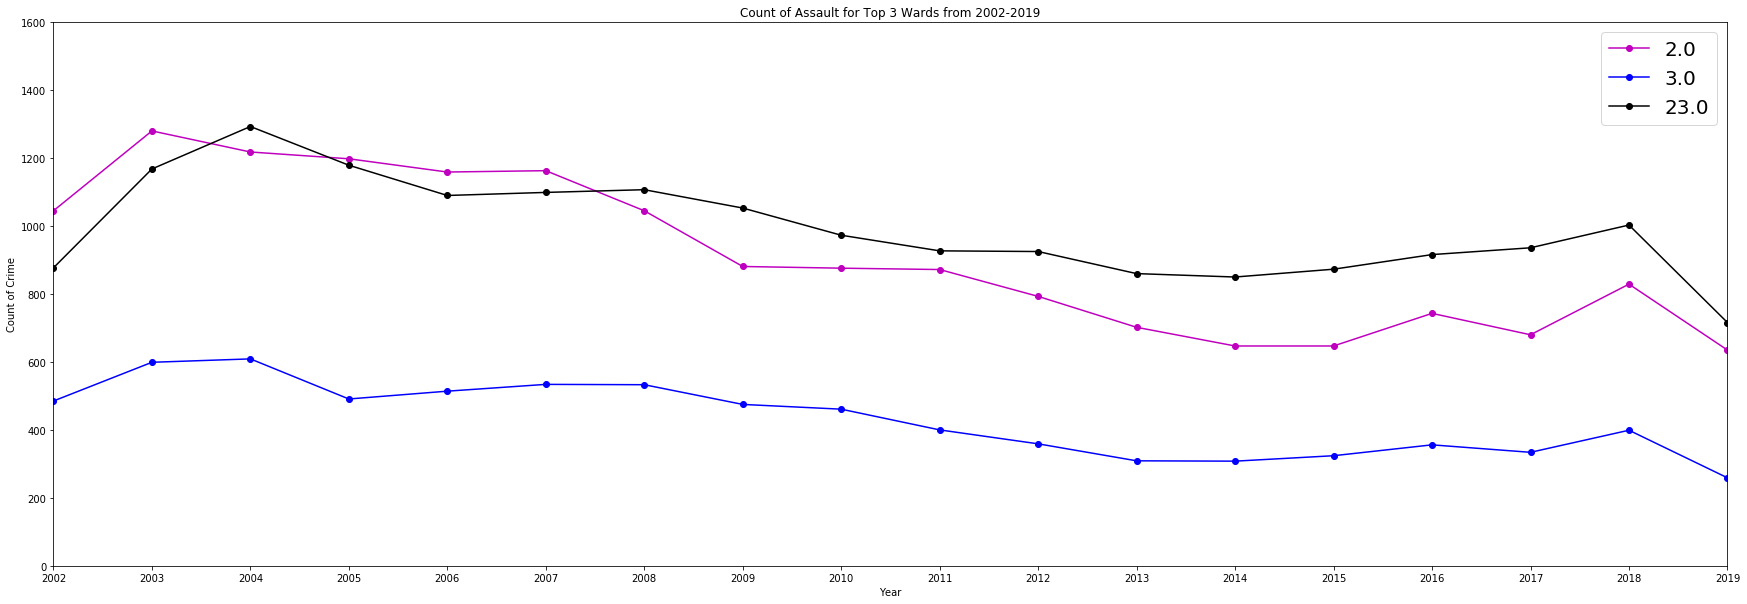

<Figure size 2160x720 with 0 Axes>

In [30]:
ax = drop_pivot_top_assault_ward_year_df.plot(color=['m', 'b', 'k'],marker='o', xticks=drop_pivot_top_assault_ward_year_df.index)

plt.legend([('2.0'), ('3.0'), ('23.0')], loc='best', prop={'size': 20})

plt.title("Count of Assault for Top 3 Wards from 2002-2019")

plt.xlim(2002,2019)
plt.xlabel('Year')

plt.ylim(0, 1600)
plt.ylabel('Count of Crime')
plt.show()


plt.savefig('Assault Top 3 Wards', dpi=96.0, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [31]:
battery_ward_year_df = remove_na_all_crime_df[remove_na_all_crime_df["Primary Type"].isin(["BATTERY"])].groupby(["Wards", "Primary Type", "Year"])["ID"].count().reset_index(name='counts')
battery_ward_year_df.head()

,Wards,Primary Type,Year,counts
0,1.0,BATTERY,2001,1
1,1.0,BATTERY,2002,882
2,1.0,BATTERY,2003,1071
3,1.0,BATTERY,2004,1161
4,1.0,BATTERY,2005,1141


In [32]:
top_battery_ward_year_df = battery_ward_year_df[battery_ward_year_df["Wards"].isin(['2.0', '3.0', '23.0'])].groupby(['Wards', 'Primary Type', 'Year', 'counts']).count().reset_index()
top_battery_ward_year_df.head()


,Wards,Primary Type,Year,counts
0,2.0,BATTERY,2001,2
1,2.0,BATTERY,2002,3329
2,2.0,BATTERY,2003,4147
3,2.0,BATTERY,2004,3961
4,2.0,BATTERY,2005,3926


In [33]:
pivot_top_battery_ward_year_df = top_battery_ward_year_df.pivot(index="Year", columns="Wards", values='counts')
pivot_top_battery_ward_year_df.head()

Wards,2.0,3.0,23.0
Year,,,
2001,2,1,23
2002,3329,1450,3256
2003,4147,1912,4415
2004,3961,1849,4304
2005,3926,1786,4196


In [34]:
drop_pivot_top_battery_ward_year_df = pivot_top_battery_ward_year_df.dropna()
drop_pivot_top_battery_ward_year_df.head()

Wards,2.0,3.0,23.0
Year,,,
2001,2,1,23
2002,3329,1450,3256
2003,4147,1912,4415
2004,3961,1849,4304
2005,3926,1786,4196


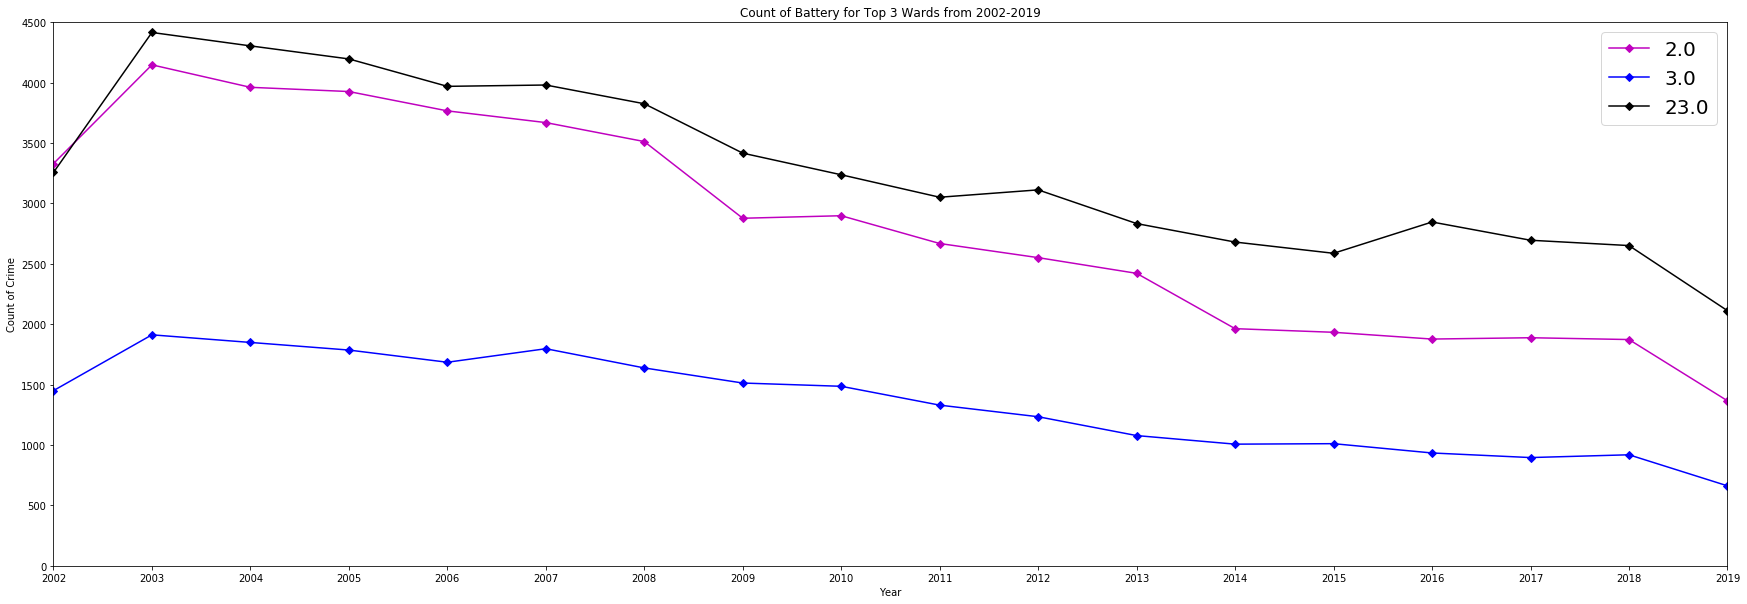

<Figure size 2160x720 with 0 Axes>

In [35]:
ax = drop_pivot_top_battery_ward_year_df.plot(color=['m', 'b', 'k'], marker='D', xticks=drop_pivot_top_battery_ward_year_df.index)

plt.legend([('2.0'), ('3.0'), ('23.0')], loc='best', prop={'size': 20})

plt.title("Count of Battery for Top 3 Wards from 2002-2019")

plt.xlim(2002,2019)
plt.xlabel('Year')

plt.ylim(0, 4500)
plt.ylabel('Count of Crime')
plt.show()
plt.savefig("Battery_by_Year.png")

plt.savefig('Battery Top 3 Wards', dpi=96.0, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [36]:
crim_ward_year_df = remove_na_all_crime_df[remove_na_all_crime_df["Primary Type"].isin(["CRIM SEXUAL ASSAULT"])].groupby(["Wards", "Primary Type", "Year"])["ID"].count().reset_index(name='counts')
crim_ward_year_df.head()

,Wards,Primary Type,Year,counts
0,1.0,CRIM SEXUAL ASSAULT,2002,18
1,1.0,CRIM SEXUAL ASSAULT,2003,16
2,1.0,CRIM SEXUAL ASSAULT,2004,12
3,1.0,CRIM SEXUAL ASSAULT,2005,22
4,1.0,CRIM SEXUAL ASSAULT,2006,14


In [37]:
top_crim_ward_year_df = crim_ward_year_df[crim_ward_year_df["Wards"].isin(['2.0', '3.0', '23.0'])].groupby(['Wards', 'Primary Type', 'Year', 'counts']).count().reset_index()
top_crim_ward_year_df.head()

,Wards,Primary Type,Year,counts
0,2.0,CRIM SEXUAL ASSAULT,2001,8
1,2.0,CRIM SEXUAL ASSAULT,2002,55
2,2.0,CRIM SEXUAL ASSAULT,2003,73
3,2.0,CRIM SEXUAL ASSAULT,2004,58
4,2.0,CRIM SEXUAL ASSAULT,2005,56


In [38]:
pivot_top_crim_ward_year_df = top_crim_ward_year_df.pivot(index="Year", columns="Wards", values='counts')
pivot_top_crim_ward_year_df.head()

Wards,2.0,3.0,23.0
Year,,,
2001,8,3,3
2002,55,33,58
2003,73,27,63
2004,58,35,62
2005,56,28,52


In [39]:
drop_pivot_top_crim_ward_year_df = pivot_top_crim_ward_year_df.dropna()
drop_pivot_top_crim_ward_year_df.head()

Wards,2.0,3.0,23.0
Year,,,
2001,8,3,3
2002,55,33,58
2003,73,27,63
2004,58,35,62
2005,56,28,52


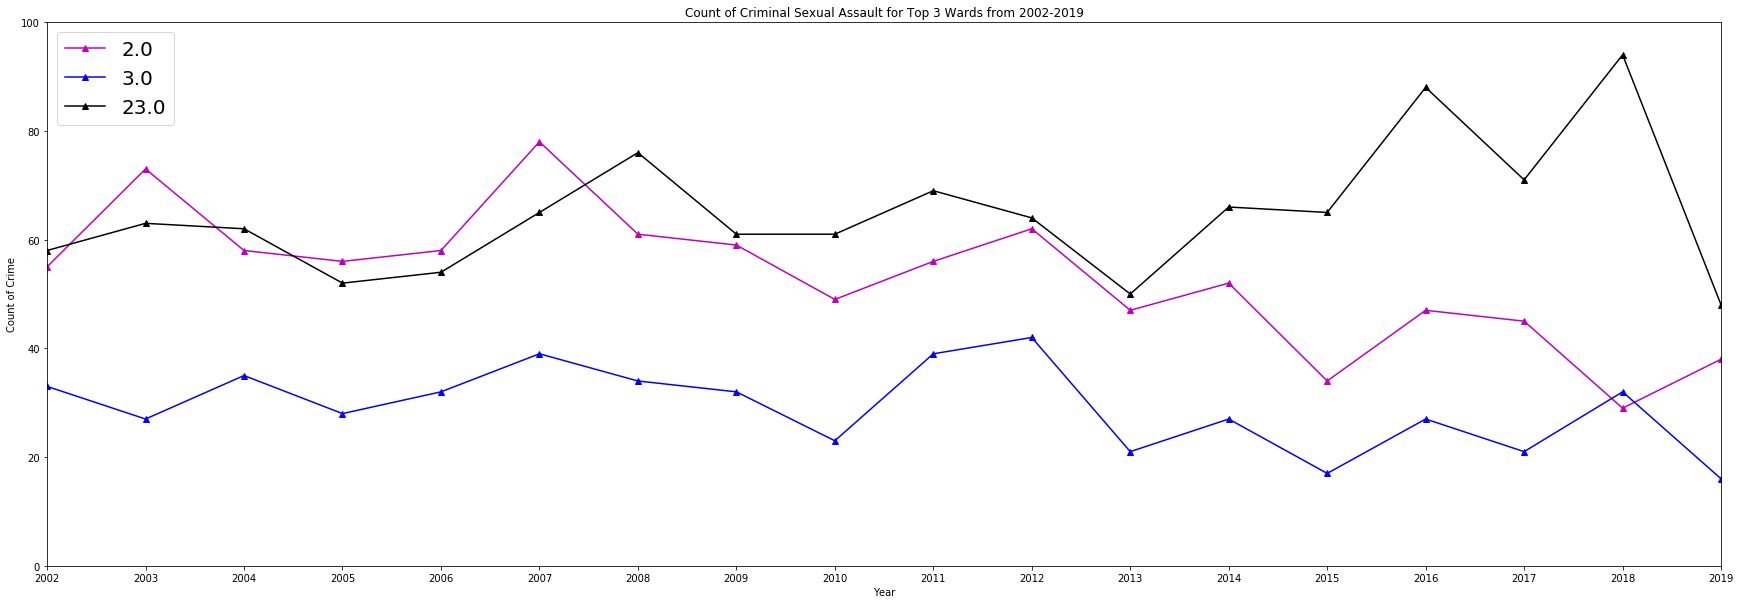

<Figure size 2160x720 with 0 Axes>

In [40]:
ax = drop_pivot_top_crim_ward_year_df.plot(color=['m', 'b', 'k'], marker='^', xticks=drop_pivot_top_crim_ward_year_df.index)

plt.legend([('2.0'), ('3.0'), ('23.0')], loc='best', prop={'size': 20})

plt.title("Count of Criminal Sexual Assault for Top 3 Wards from 2002-2019")

plt.xlim(2002,2019)
plt.xlabel('Year')

plt.ylim(0, 100)
plt.ylabel('Count of Crime')

plt.show()

plt.savefig('CSA Top 3 Wards', dpi=96.0, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)